In [2]:
# importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure
import scipy as scipy
from scipy import stats

In [32]:
# reading the dataset and printing it
df = pd.read_csv("E:/Siva/SSSIHL/MSc Data Science/1st Sem/102 Lab/wine/wine.data")

# giving names to all columns as attributes in the dataframe
attributes = ['Class','Alcohol','Malic Acid','Ash','Alcanlinity of ash','Magnesium','Total Phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color Intensity','Hue','OD280/OD315 of diluted wines','Proline']

df = pd.read_csv("E:/Siva/SSSIHL/MSc Data Science/1st Sem/102 Lab/wine/wine.data",names = attributes)

# giving names to all columns as attributes in the dataframe
df.columns = attributes

# printing the dataframe
df

,Class,Alcohol,Malic Acid,Ash,Alcanlinity of ash,Magnesium,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [33]:
# Using boxcox and finding the lambda value for all the attributes
transformed_df = pd.DataFrame()
lam_values = {}

for feature in df.columns:
    x = df[feature]
    arr, lam = scipy.stats.boxcox(x)
    transformed_df[feature] = arr
    lam_values[feature] = lam

for feature, lam in lam_values.items():
    print("{}: {}".format(feature, lam))

Class: 0.48196037779749656
Alcohol: 1.2645832732417026
Malic Acid: -0.2777553299119975
Ash: 1.4274804565551202
Alcanlinity of ash: 0.6919715190731625
Magnesium: -1.4291229687602396
Total Phenols: 0.6859232927312355
Flavanoids: 0.7349769472925217
Nonflavanoid phenols: 0.2680866130069868
Proanthocyanins: 0.5674163105392768
Color Intensity: 0.07589005110579095
Hue: 0.8855434430706487
OD280/OD315 of diluted wines: 1.3761931905305107
Proline: -0.10330889162354384


In [34]:
# Applying boxcox transformation i.e. (x^lam - 1) / lam and finding the transformed skewness
transformed_skewval = {}

for feature in df.columns:
    lam = lam_values[feature]
    boxcox = ( (df[feature] ** lam) - 1 ) / lam
    transformed_skewval[feature] = boxcox.skew()
    
for feature, boxcox in transformed_skewval.items():
    print("{}: {}".format(feature, boxcox))

Class: -0.10049063090882791
Alcohol: -0.02310021088656273
Malic Acid: 0.02705533278901975
Ash: 0.05451952647078125
Alcanlinity of ash: 0.01798822314509051
Magnesium: 0.0063529133891043485
Total Phenols: -0.06103072489920033
Flavanoids: -0.1860890966134892
Nonflavanoid phenols: -0.021171264030068592
Proanthocyanins: 0.004079668699416989
Color Intensity: -0.00718428294803126
Hue: -0.0433574383482985
OD280/OD315 of diluted wines: -0.17374922969904125
Proline: 0.012054931473743811


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic Acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcanlinity of ash            178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total Phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color Intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [36]:
int_columns = df.select_dtypes(include=['int']).columns
df = df.drop(int_columns, axis=1)

In [37]:
new_df = pd.DataFrame()

for feature in df.columns:
    transformed_data = ((df[feature] ** lam) - 1) / lam
    new_df[feature] = transformed_data

In [38]:
new_df

,Alcohol,Malic Acid,Ash,Alcanlinity of ash,Total Phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color Intensity,Hue,OD280/OD315 of diluted wines
0,2.322282,0.521897,0.848386,2.391817,0.976751,1.056221,-1.360462,0.794082,1.584119,0.039141,1.274073
1,2.264950,0.559775,0.731675,2.138018,0.927106,0.963804,-1.445310,0.243739,1.369875,0.048667,1.149576
2,2.262625,0.821678,0.933902,2.523050,0.976751,1.106992,-1.282052,0.979955,1.590028,0.029514,1.087627
3,2.329719,0.645312,0.874259,2.447400,1.258412,1.172568,-1.537685,0.748778,1.850804,-0.152004,1.162431
4,2.267267,0.906373,0.998923,2.612218,0.976751,0.940642,-0.988929,0.580689,1.358026,0.039141,1.017459
...,...,...,...,...,...,...,...,...,...,...,...
173,2.293931,1.585601,0.855862,2.594601,0.505136,-0.507135,-0.676521,0.058094,1.840361,-0.456735,0.538336
174,2.276460,1.271855,0.866949,2.678328,0.570296,-0.292000,-0.881856,0.337563,1.797038,-0.363328,0.434626
175,2.269000,1.350025,0.781968,2.576504,0.452801,-0.378268,-0.881856,0.295500,2.064796,-0.542278,0.434626
176,2.263207,0.906373,0.825547,2.576504,0.488042,-0.393448,-0.656161,0.371134,1.991779,-0.524545,0.470602


In [39]:
# To estimate µ

alpha = 0.95

interval_estimation = {}

for column in new_df.columns:
    mean = df[column].mean()
    
    n = len(df)
    sample_variance = df[column].var()
    
    standard_deviation = (sample_variance / n) ** 0.5
    
    degrees_of_freedom = n - 1
    t_value = stats.t.ppf(1 - (1 - alpha) / 2, df=degrees_of_freedom)
    
    rhs = t_value * standard_deviation
    
    lb = mean - rhs
    ub = mean + rhs

    interval_estimation[column] = (lb, ub)


In [40]:
for column, interval in interval_estimation.items():
    print(f'{column} CI: ({interval[0]}, {interval[1]})')

Alcohol CI: (12.880535136274652, 13.120700818781529)
Malic Acid CI: (2.171103559457129, 2.501593069756354)
Ash CI: (2.3259367465492953, 2.4070969613158737)
Alcanlinity of ash CI: (19.000965997456948, 19.98892164299249)
Total Phenols CI: (2.202538430728236, 2.3876862883728878)
Flavanoids CI: (1.8815216117155595, 2.177017714127138)
Nonflavanoid phenols CI: (0.34344518390870166, 0.3802626812598376)
Proanthocyanins CI: (1.5062373443789476, 1.6755604084300413)
Color Intensity CI: (4.7151762899022165, 5.401003474142727)
Hue CI: (0.9236398473972783, 0.991259029007216)
OD280/OD315 of diluted wines CI: (2.50666583063329, 2.7167049558835634)


In [42]:
# Using Standard Normal Distribution

alpha = 0.95

interval_estimation = {}

for column in new_df.columns:
    mean = df[column].mean()
    
    n = len(df)
    sample_variance = df[column].var()
    
    standard_deviation = (sample_variance / n) ** 0.5
    
    degrees_of_freedom = n - 1
    z_value = stats.norm.ppf(1 - (1 - alpha) / 2)
    
    rhs = z_value * standard_deviation
    
    lb = mean - rhs
    ub = mean + rhs

    interval_estimation[column] = (lb, ub)


In [44]:
for column, interval in interval_estimation.items():
    print(f'{column} CI: ({interval[0]}, {interval[1]})')

Alcohol CI: (12.881356184655965, 13.119879770400216)
Malic Acid CI: (2.172233395637884, 2.500463233575599)
Ash CI: (2.3262142069352483, 2.4068195009299207)
Alcanlinity of ash CI: (19.004343496586337, 19.985544143863102)
Total Phenols CI: (2.2031713910547728, 2.387053328046351)
Flavanoids CI: (1.8825318168124605, 2.176007509030237)
Nonflavanoid phenols CI: (0.34357105096134877, 0.3801368142071905)
Proanthocyanins CI: (1.5068162048814426, 1.6749815479275463)
Color Intensity CI: (4.717520910056117, 5.3986588539888265)
Hue CI: (0.9238710153935841, 0.9910278610109102)
OD280/OD315 of diluted wines CI: (2.5073838861106545, 2.715986900406199)


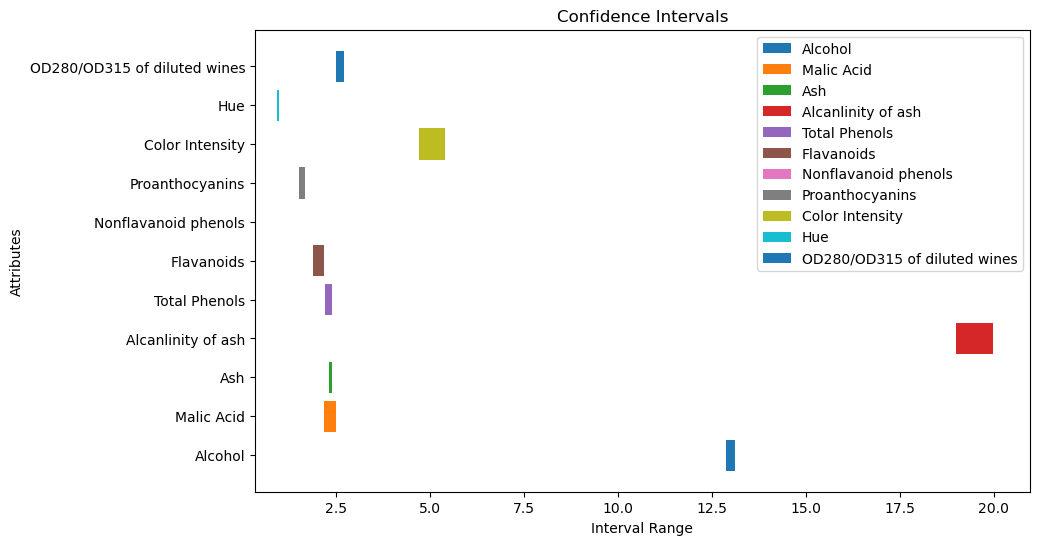

In [45]:
attribute_names = list(interval_estimation.keys())
intervals = [interval_estimation[attr] for attr in attribute_names]

plt.figure(figsize=(10, 6))
for i, attr in enumerate(attribute_names):
    plt.barh(attr, intervals[i][1] - intervals[i][0], left=intervals[i][0], label=attr)

plt.xlabel('Interval Range')
plt.ylabel('Attributes')
plt.title('Confidence Intervals')
plt.legend()
plt.show()


In [46]:
# To estimate Variance

alpha = 0.95

interval_estimation = {}

for column in new_df.columns:
    mean = df[column].mean()
    
    n = len(df)
    sample_variance = df[column].var()
    
    degrees_of_freedom = n - 1
    chi_square_critical_lower = stats.chi2.ppf(alpha / 2, df=degrees_of_freedom)
    chi_square_critical_upper = stats.chi2.ppf(1 - alpha / 2, df=degrees_of_freedom)
    
    interval_lower = ((n - 1) * sample_variance) / chi_square_critical_upper
    interval_upper = ((n - 1) * sample_variance) / chi_square_critical_lower
    
    lb = ((n - 1) * sample_variance) / chi_square_critical_upper
    ub = ((n - 1) * sample_variance) / chi_square_critical_lower

    interval_estimation[column] = (lb, ub)


In [49]:
for column, interval in interval_estimation.items():
    print(f'{column} CI: ({interval[0]}, {interval[1]})')

Alcohol CI: (0.6571553491233666, 0.6659887095203798)
Malic Acid CI: (1.2444043052304297, 1.2611313572469105)
Ash CI: (0.07504685915896926, 0.07605562512960219)
Alcanlinity of ash CI: (11.120416164904396, 11.269894737787366)
Total Phenols CI: (0.39055619244786277, 0.39580597639587345)
Flavanoids CI: (0.9948318011433979, 1.0082041458190243)
Nonflavanoid phenols CI: (0.01544381797551833, 0.01565141091418284)
Proanthocyanins CI: (0.32664678153720855, 0.33103750702957746)
Color Intensity CI: (5.358898562275675, 5.430931883460328)
Hue CI: (0.05209379135153405, 0.05279402643912598)
OD280/OD315 of diluted wines CI: (0.5026278488021731, 0.5093840791820488)
